In [61]:
import os 
import sys
from pathlib import Path

import numpy as np
import pandas as pd

from scipy.spatial import Delaunay

from alpha_shape import AlphaShape3D
from cluster import Cluster
from plot import Plot

from config import Config
from io_handler import IOHandler

In [3]:
config = Config(
        config_dir = Path("../config").resolve(),
        filenames = ["settings.json"]
    )

config_data = next(config.load())

io = IOHandler(
    data_dir = Path("../data/points").resolve(),
    save_dir = Path("../results").resolve()
)

In [4]:
bio_data = io.load_point_cloud("bio-protein.arff")

INFO 	 24-10-22 10:56:55 Loading point cloud 'bio-protein.arff' from '/Users/anirudh/Documents/Ruprecht-Karls-Universitaet-Heidelberg/Master Thesis/code/data/points'.


INFO 	 24-10-22 11:51:33 Constructed the delaunay triangulation with furthest_site = False and 78693 simplices.
INFO 	 24-10-22 11:51:33 α-shape with 78827 simplices generated.
INFO 	 24-10-22 11:51:33 Fitting the cluster model...
INFO 	 24-10-22 11:51:33 Visualizing α-shape...
INFO 	 24-10-22 11:51:33 Predicting the clusters using the α-shape...
INFO 	 24-10-22 11:51:33 Visualizing clusters...


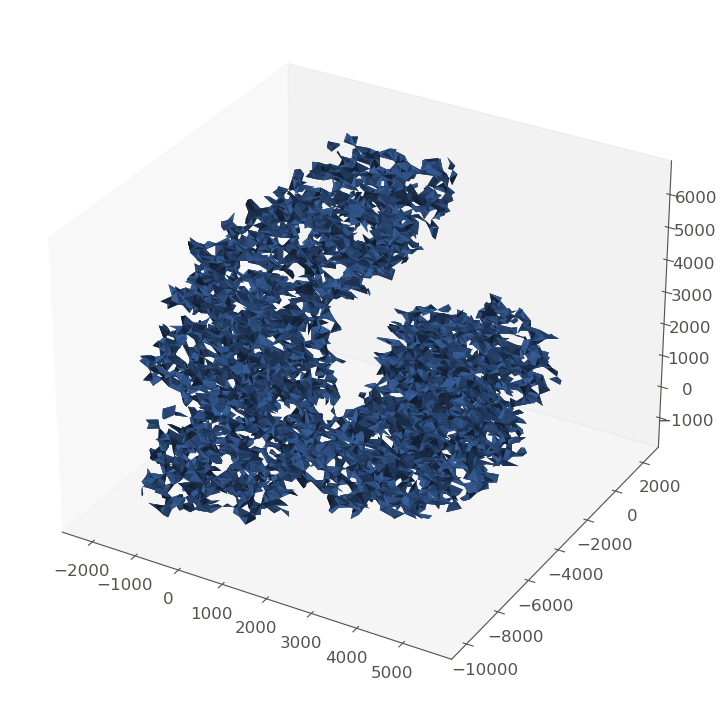

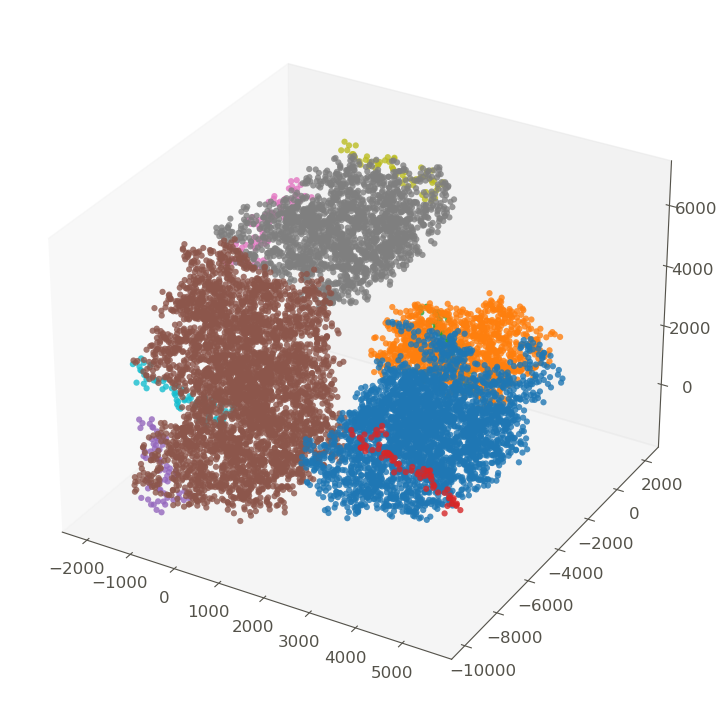

In [74]:
points = bio_data[["x", "y", "z"]].to_numpy()
# points = points + np.random.normal(0, 0.01, points.shape)
ac = AlphaShape3D(points, 0.005267)
plot = Plot(points)
ac.fit()

clst = Cluster(
    shape = ac.get_shape
)
clst.fit()
fig = plot.alpha_shape(
    ac.get_shape,
    points_q = False
)
predicted_clusters = clst.predict(10)
fig = plot.clusters(
    predicted_clusters
)